In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading dataset from Google Drive**

In [ ]:
#dataset path

data_path = '/content/drive/MyDrive/training datasets/ecd.txt'

# Lists to store text and emotion labels
texts = []
emotions = []

# Read the file and extract text and emotion
with open(data_path, 'r', encoding='utf-8') as file:
    for line in file:
        line = line.strip()
        if line:
            text, emotion = line.split(';')
            texts.append(text)
            emotions.append(emotion)

# Print a few examples
for i in range(10):
    print(f'Text: {texts[i]}, Emotion: {emotions[i]}')
print(len(texts))

Text: i didnt feel humiliated, Emotion: sadness
Text: i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake, Emotion: sadness
Text: im grabbing a minute to post i feel greedy wrong, Emotion: anger
Text: i am ever feeling nostalgic about the fireplace i will know that it is still on the property, Emotion: love
Text: i am feeling grouchy, Emotion: anger
Text: ive been feeling a little burdened lately wasnt sure why that was, Emotion: sadness
Text: ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny, Emotion: surprise
Text: i feel as confused about life as a teenager or as jaded as a year old man, Emotion: fear
Text: i have been with petronas for years i feel that petronas has performed well and made a huge profit, Emotion: joy
Text: i feel romantic too, Emotion: love
16166


**installing keras**

In [ ]:
!pip install keras
!pip install pandas


** importing needed libraries**

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.layers import Embedding

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'texts' and 'emotions' are your data
texts_train, texts_test, emotions_train, emotions_test = train_test_split(texts, emotions, test_size=0.2, random_state=42)


In [ ]:

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts_train)

sequences_train = tokenizer.texts_to_sequences(texts_train)
sequences_test = tokenizer.texts_to_sequences(texts_test)

max_length = max(len(seq) for seq in sequences_train + sequences_test)

padded_sequences_train = pad_sequences(sequences_train, maxlen=max_length)
padded_sequences_test = pad_sequences(sequences_test, maxlen=max_length)

In [ ]:
# Assuming 'emotions_train' and 'emotions_test' are your labels
label_encoder = LabelEncoder()

# Fit the label encoder on the combined set of labels (train + test)
all_emotions = emotions_train + emotions_test
label_encoder.fit(all_emotions)

# Transform the string labels to numerical labels
numerical_labels_train = label_encoder.transform(emotions_train)
numerical_labels_test = label_encoder.transform(emotions_test)

# Perform one-hot encoding on the numerical labels
num_classes = len(label_encoder.classes_)
one_hot_labels_train = to_categorical(numerical_labels_train, num_classes=num_classes)
one_hot_labels_test = to_categorical(numerical_labels_test, num_classes=num_classes)

In [ ]:
print(num_classes)


'''# Use the inverse_transform method to decode the numeric labels
decoded_labels = label_encoder.inverse_transform()
'''
# Now 'decoded_labels' contains the corresponding class names
print(label_encoder.classes_)

7
[' neutral' 'anger' 'fear' 'joy' 'love' 'sadness' 'surprise']


# Defining LSTM **model**

Building  an LSTM model for sentiment analysis with a softmax activation function in the output layer.

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding

embedding_dim = 100  # Adjust based on your chosen word embeddings
vocab_size = len(tokenizer.word_index) + 1

embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length)

model = Sequential()
model.add(embedding_layer)
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))  # 5 is the number of unique emotion labels

compiling the model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 66, 100)           1373000   
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 7)                 707       
                                                                 
Total params: 1454107 (5.55 MB)
Trainable params: 1454107 (5.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


training the model with history

In [ ]:
# Model Training with History
history = model.fit(
    padded_sequences_train, one_hot_labels_train,
    epochs=16, batch_size=32,
    validation_data=(padded_sequences_test, one_hot_labels_test)
)


Epoch 1/16
405/405 [==============================] - 123s 294ms/step - loss: 1.3489 - accuracy: 0.4854 - val_loss: 0.7510 - val_accuracy: 0.7393
Epoch 2/16
405/405 [==============================] - 99s 243ms/step - loss: 0.3961 - accuracy: 0.8732 - val_loss: 0.2789 - val_accuracy: 0.9066
Epoch 3/16
405/405 [==============================] - 95s 234ms/step - loss: 0.1515 - accuracy: 0.9495 - val_loss: 0.2702 - val_accuracy: 0.9066
Epoch 4/16
405/405 [==============================] - 94s 232ms/step - loss: 0.0946 - accuracy: 0.9684 - val_loss: 0.2231 - val_accuracy: 0.9181
Epoch 5/16
405/405 [==============================] - 93s 228ms/step - loss: 0.0605 - accuracy: 0.9809 - val_loss: 0.2732 - val_accuracy: 0.9199
Epoch 6/16
405/405 [==============================] - 92s 226ms/step - loss: 0.0557 - accuracy: 0.9814 - val_loss: 0.2596 - val_accuracy: 0.9205
Epoch 7/16
405/405 [==============================] - 92s 228ms/step - loss: 0.0481 - accuracy: 0.9849 - val_loss: 0.3192 - val_a

# **Required graph for training and validation loss**

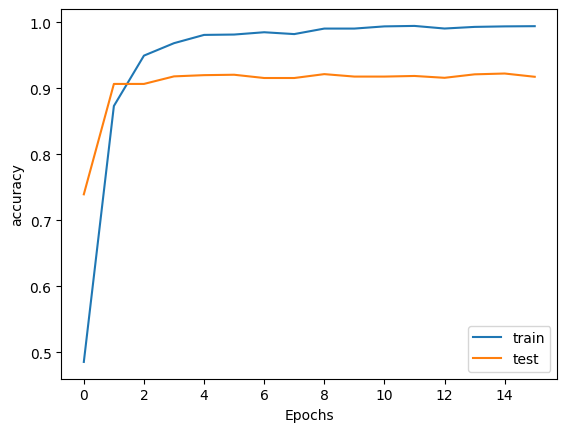

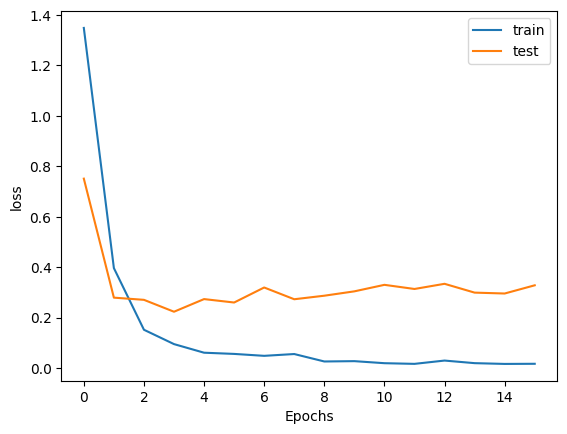

In [ ]:
import matplotlib.pyplot as plt
##plot the scores from history
def plot_metrics(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric])
  plt.legend(['train','test'])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.show()

##plot accuracy
plot_metrics(history, "accuracy")

##plot loss
plot_metrics(history, "loss")


confusion matrix

102/102 [==============================] - 2s 20ms/step
[[3.9486090e-06 8.9045425e-06 6.8257905e-05 ... 5.7424045e-06
  9.9989712e-01 5.2191726e-06]
 [1.0532974e-06 2.9832399e-06 3.2839530e-06 ... 1.9181014e-06
  9.9998975e-01 4.6388178e-07]
 [8.6199543e-05 3.1079922e-04 4.8847600e-05 ... 9.4285876e-01
  1.4486846e-04 2.5952922e-04]
 ...
 [1.9530711e-08 5.6293015e-08 5.9853267e-07 ... 1.1784667e-06
  1.6086591e-06 3.9615923e-08]
 [3.1614079e-05 9.8198903e-01 1.5111304e-03 ... 6.0496368e-03
  7.8056930e-03 1.7651662e-03]
 [2.1201267e-06 3.3101818e-04 2.9758324e-03 ... 5.7282396e-05
  2.2231327e-06 9.9662280e-01]]
[[3.9486090e-06 8.9045425e-06 6.8257905e-05 ... 5.7424045e-06
  9.9989712e-01 5.2191726e-06]
 [1.0532974e-06 2.9832399e-06 3.2839530e-06 ... 1.9181014e-06
  9.9998975e-01 4.6388178e-07]
 [8.6199543e-05 3.1079922e-04 4.8847600e-05 ... 9.4285876e-01
  1.4486846e-04 2.5952922e-04]
 ...
 [1.9530711e-08 5.6293015e-08 5.9853267e-07 ... 1.1784667e-06
  1.6086591e-06 3.9615923e-08]
 [3

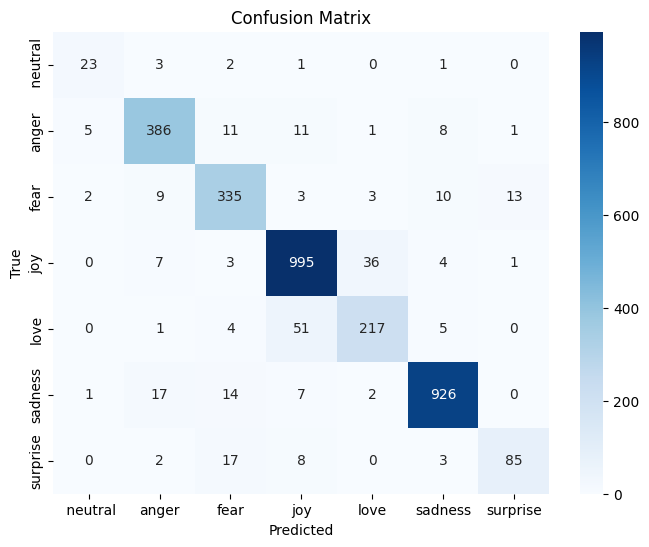

['sadness', 'sadness', 'joy', 'joy', 'joy', 'sadness', 'joy', 'joy', 'sadness', 'anger', 'love', 'joy', 'fear', 'love', 'sadness', 'sadness', 'joy', 'fear', 'anger', 'sadness', 'love', 'sadness', 'surprise', 'love', 'surprise', 'anger', 'love', 'sadness', 'sadness', 'anger', 'sadness', 'anger', 'fear', 'love', 'fear', 'love', 'sadness', 'fear', 'fear', 'surprise', 'sadness', 'love', 'sadness', 'joy', 'joy', 'joy', 'anger', 'joy', ' neutral', 'joy', 'fear', 'love', 'sadness', 'anger', 'sadness', 'love', 'fear', 'joy', 'fear', 'joy', 'anger', 'sadness', 'joy', 'joy', 'sadness', 'joy', 'joy', 'joy', 'sadness', 'fear', 'sadness', 'joy', 'sadness', 'sadness', 'sadness', 'joy', 'anger', 'sadness', 'sadness', 'joy', 'joy', 'sadness', 'sadness', 'joy', 'anger', 'joy', 'joy', 'sadness', 'joy', 'joy', 'sadness', 'joy', 'love', 'joy', 'sadness', 'anger', 'joy', 'anger', 'sadness', 'love', 'joy', 'joy', 'joy', 'sadness', 'sadness', 'sadness', 'sadness', ' neutral', 'anger', 'joy', 'love', 'joy', '

In [ ]:

import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report



# Model Prediction
predictions = model.predict(padded_sequences_test)
print(predictions)


predicted_label = [round(p[0]) for p in predictions]

# Assuming 'emotions_test' is your test labels
numerical_labels_test = label_encoder.transform(emotions_test)

print(predictions)
print(numerical_labels_test)

label=[]


#labeling the predicted encoded labels to original text

# Find the index of the maximum value
for i, array in enumerate(predictions):
    # Convert the array to a numpy array
    input_array = np.array(array)

    # Find the index of the maximum value
    predicted_label_index = np.argmax(input_array)

    # Assuming 'class_labels' is a list of your class labels
    class_labels = ['neutral','angry', 'fear', 'joy', 'love', 'sadness', 'suprised']

    # Get the predicted label
    predicted_label = class_labels[predicted_label_index]
    label.append(predicted_label_index)
#print(f"Example {i+1} - Predicted Label Index: {predicted_label_index}, Predicted Label: {predicted_label}")
print(label)



# Confusion Matrix
conf_matrix = confusion_matrix(numerical_labels_test, label)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(emotions_test)
print(numerical_labels_test)



# Basic Evaluation Metrics
accuracy = accuracy_score(numerical_labels_test, label)
precision = precision_score(numerical_labels_test, label, average='weighted')
recall = recall_score(numerical_labels_test, label, average='weighted')
f1 = f1_score(numerical_labels_test, label, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


# Classification Report
print(classification_report(numerical_labels_test, label, target_names=label_encoder.classes_))


Testing with one data

In [ ]:

import pandas as pd
# Decode one-hot encoded labels back to original labels
decoded_predictions = label_encoder.inverse_transform(label)

# Display Predicted Labels and Original Text
results_df = pd.DataFrame({'Text': texts_test, 'True Label': emotions_test, 'Predicted Label': decoded_predictions})

# Display a subset of the results (adjust as needed)
subset_results = results_df.head(20)
print(subset_results)



                                                 Text True Label  \
0   ive heard stories about julie baileys treatmen...    sadness   
1                     i feel all gloomy and i hate it    sadness   
2   i feel like learning not to judge people is th...        joy   
3   i feel sure that this will be a night to remember        joy   
4                   i feel a bit optimistic some days        joy   
5                             i feel extremely boring    sadness   
6   i mane is feeling generous and releases his ne...        joy   
7   i can eat soup drink tea and wear sweaters but...        joy   
8                i can wear anything and not feel bad    sadness   
9   i feel about puppy mills puppy mills are run b...      anger   
10  i feel especially passionate about the friends...       love   
11  i feel so friggin blessed with a wonderful car...        joy   
12  i signed the petition and knowing that it will...       fear   
13  im feeling romantic towards not another rela

# **Saving the model**

In [ ]:
from keras.models import save_model


# Specify the full path where you want to save the model
model_path = '/content/drive/MyDrive/training datasets/emotion_recognition.h5'

# Save the model to the specified path
model.save(model_path)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
